Kasthuri A S Nair

AM.EN.U4CSE19328

CSE D

#**Data Pre-processing**

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import boxplot

In [ ]:
from sklearn import preprocessing as ps
from sklearn import metrics
from sklearn.model_selection import RepeatedKFold , StratifiedKFold
from sklearn.preprocessing import StandardScaler as sc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

In [ ]:
from sklearn import tree     
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

In [ ]:
pcos_dt = pd.read_csv('https://raw.githubusercontent.com/kasthuri28/Diagnosis_of_PCOS/master/pcos_dataset/PCOS_data.csv')
pcos_dt.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of abortions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.3,15,78,22,10.48,2,5,7.0,0,0,1.99,1.99,7.95,3.68,2.16,36,30,0.83,0.68,2.07,45.16,17.1,0.57,92.0,0,0,0,0,0,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.9,15,74,20,11.70,2,5,11.0,1,0,60.80,1.99,6.73,1.09,6.17,38,32,0.84,3.16,1.53,20.09,61.3,0.97,92.0,0,0,0,0,0,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.3,11,72,18,11.80,2,5,10.0,1,0,494.08,494.08,5.54,0.88,6.30,40,36,0.90,2.54,6.63,10.52,49.7,0.36,84.0,0,0,0,1,1,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.7,13,72,20,12.00,2,5,4.0,0,0,1.99,1.99,8.06,2.36,3.42,42,36,0.86,16.41,1.22,36.90,33.4,0.36,76.0,0,0,0,0,0,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.1,11,72,18,10.00,2,5,1.0,1,0,801.45,801.45,3.98,0.90,4.42,37,30,0.81,3.57,2.26,30.09,43.8,0.38,84.0,0,0,0,1,0,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [ ]:
pcos_dt.shape

(541, 45)

In [ ]:
pcos_dt.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of abortions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Unnamed: 44'],
      dtype='object')

In [ ]:
#To remove whitespaces at both ends from a column name

pcos_dt.columns = pcos_dt.columns.str.strip()

In [ ]:
pcos_dt.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', 'Age (yrs)', 'Weight (Kg)',
       'Height(Cm)', 'BMI', 'Blood Group', 'Pulse rate(bpm)',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of abortions',
       'I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Unnamed: 44'],
      dtype='object')

Removing unwanted columns

In [ ]:
pcos_dt.drop(['Sl. No', 'Patient File No.','Unnamed: 44'],axis='columns',inplace=True)

###*Imputing Missing values*

Rows with unmatching values are removed and some values are replaced 

In [ ]:
pcos_dt = pcos_dt.replace(pcos_dt['II    beta-HCG(mIU/mL)'][123],'1.99')
pcos_dt.drop(labels=305,axis=0,inplace=True)

Searching for columns with missing values

In [ ]:
pcos_dt.isnull().sum()

PCOS (Y/N)                0
Age (yrs)                 0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     1
Pregnant(Y/N)             0
No. of abortions          0
I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)           1
Reg.Exercise(Y/N)         0
BP _Systolic (mmHg) 

In [ ]:
# Replacing the missing values in a feature column with the median of the feature

pcos_dt['Marraige Status (Yrs)'].fillna(pcos_dt['Marraige Status (Yrs)'].median(), inplace = True)
pcos_dt['Fast food (Y/N)'].fillna(pcos_dt['Fast food (Y/N)'].median(), inplace = True)

In [ ]:
pcos_dt.isnull().sum()

PCOS (Y/N)                0
Age (yrs)                 0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     0
Pregnant(Y/N)             0
No. of abortions          0
I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)           0
Reg.Exercise(Y/N)         0
BP _Systolic (mmHg) 

###*Standardization*

In [ ]:
scaler = ps.StandardScaler()
pcos_sc = scaler.fit_transform(pcos_dt)
pcos_standardized_dt = pd.DataFrame(pcos_sc,columns = pcos_dt.columns)

In [ ]:
pcos_standardized_dt.head()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of abortions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,-0.698286,-0.632736,-1.364256,-0.745075,-1.234925,0.649989,1.07303,1.633230,-0.783571,-0.622331,0.039718,-0.141113,-0.785345,-0.41719,-0.198193,-0.147575,-0.030750,-0.032320,-0.078137,-0.503842,-1.068363,-1.335203,-0.613226,-0.604849,1.392065,-0.094848,-0.010901,-0.422190,-0.779194,-0.614452,-0.666221,-0.911322,-0.978019,0.967204,-0.571648,-0.630249,0.549622,-0.741039,-0.821501,0.837271,0.768152,0.008677
1,-0.698286,0.847188,0.485719,0.830263,0.146043,0.649989,0.17013,0.448617,0.624242,-0.622331,0.039718,0.692370,1.273326,-0.41719,-0.180632,-0.147575,-0.036372,-0.062202,-0.012066,0.000467,-0.512299,-1.118227,0.054620,-0.696746,-0.285971,0.032822,0.094118,-0.422190,-0.779194,-0.614452,-0.666221,-0.911322,-0.978019,-1.033908,-0.571648,0.724586,-1.246962,-0.741039,-0.370677,-0.004051,-0.437116,-2.211658
2,1.432078,0.292216,0.830323,1.410651,0.244683,-1.523349,-0.28132,-0.735996,0.739636,-0.622331,0.039718,0.483999,1.273326,-0.41719,-0.051249,0.159253,-0.041855,-0.064625,-0.009924,0.504776,0.599828,0.183626,-0.112341,0.171168,-0.926529,-0.000684,-0.066036,-0.853241,-0.779194,-0.614452,-0.666221,1.097307,1.022475,0.967204,-0.571648,0.724586,0.549622,1.623978,1.883440,0.837271,1.370786,0.702532
3,-0.698286,1.032178,0.485719,-1.408376,1.329730,-0.436680,-0.28132,0.448617,0.970425,-0.622331,0.039718,-0.766226,-0.785345,-0.41719,-0.198193,-0.147575,-0.030243,-0.047550,-0.057377,1.009084,0.599828,-0.684276,3.622748,-0.749502,0.839190,-0.047766,-0.066036,-1.284292,-0.779194,-0.614452,-0.666221,-0.911322,-0.978019,-1.033908,-0.571648,0.724586,-1.246962,-0.977540,-1.046912,-0.004051,-0.437116,-0.453892
4,-0.698286,-1.187707,-0.693187,0.747350,-1.037644,-1.523349,-0.28132,-0.735996,-1.337465,-0.622331,0.039718,-1.391338,1.273326,-0.41719,0.040536,0.350905,-0.049043,-0.064394,-0.040900,-0.251687,-1.068363,-1.769153,0.165030,-0.572515,0.383369,-0.017726,-0.060785,-0.853241,-0.779194,-0.614452,-0.666221,1.097307,-0.978019,-1.033908,-0.571648,0.724586,0.549622,-0.741039,-0.596089,0.276390,-0.437116,-0.685177


###*Normalization*

In [ ]:
scaler = ps.MinMaxScaler()
pcos_sc = scaler.fit_transform(pcos_dt)
pcos_normalized_dt = pd.DataFrame(pcos_sc,columns = pcos_dt.columns)

In [ ]:
pcos_normalized_dt.head()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of abortions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0.0,0.285714,0.176623,0.348837,0.260377,0.571429,0.942029,0.500000,0.314286,0.0,0.416667,0.233333,0.0,0.0,0.000021,0.000040,0.001532,0.001814,0.001573,0.454545,0.260870,0.318182,0.009852,0.029894,0.350125,0.002843,0.006156,0.110345,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.765625,0.782609,0.136364,0.15,0.750000,0.750000,0.472222
1,0.0,0.571429,0.441558,0.569767,0.471698,0.571429,0.884058,0.333333,0.507937,0.0,0.416667,0.366667,1.0,0.0,0.001833,0.000040,0.001291,0.000530,0.004494,0.545455,0.347826,0.363636,0.048030,0.021700,0.154021,0.010192,0.010865,0.110345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.843750,0.673913,0.136364,0.25,0.625000,0.583333,0.205556
2,1.0,0.464286,0.490909,0.651163,0.486792,0.000000,0.855072,0.166667,0.523810,0.0,0.416667,0.333333,1.0,0.0,0.015181,0.019724,0.001055,0.000426,0.004589,0.636364,0.521739,0.636364,0.038485,0.099090,0.079161,0.008263,0.003684,0.082759,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.843750,0.782609,0.590909,0.75,0.750000,0.833333,0.555556
3,0.0,0.607143,0.441558,0.255814,0.652830,0.285714,0.855072,0.333333,0.555556,0.0,0.416667,0.133333,0.0,0.0,0.000021,0.000040,0.001554,0.001160,0.002491,0.727273,0.521739,0.454545,0.252001,0.016995,0.285513,0.005553,0.003684,0.055172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.843750,0.673913,0.090909,0.10,0.625000,0.583333,0.416667
4,0.0,0.178571,0.272727,0.558140,0.290566,0.000000,0.855072,0.166667,0.238095,0.0,0.416667,0.033333,1.0,0.0,0.024651,0.032020,0.000746,0.000436,0.003220,0.500000,0.260870,0.227273,0.054341,0.032777,0.232243,0.007282,0.003920,0.082759,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.843750,0.782609,0.136364,0.20,0.666667,0.583333,0.388889


#**Data Summarization**

In [ ]:
pcos_dt.shape

(540, 42)

In [ ]:
pcos_dt.dtypes

PCOS (Y/N)                  int64
Age (yrs)                   int64
Weight (Kg)               float64
Height(Cm)                float64
BMI                       float64
Blood Group                 int64
Pulse rate(bpm)             int64
RR (breaths/min)            int64
Hb(g/dl)                  float64
Cycle(R/I)                  int64
Cycle length(days)          int64
Marraige Status (Yrs)     float64
Pregnant(Y/N)               int64
No. of abortions            int64
I   beta-HCG(mIU/mL)      float64
II    beta-HCG(mIU/mL)     object
FSH(mIU/mL)               float64
LH(mIU/mL)                float64
FSH/LH                    float64
Hip(inch)                   int64
Waist(inch)                 int64
Waist:Hip Ratio           float64
TSH (mIU/L)               float64
AMH(ng/mL)                 object
PRL(ng/mL)                float64
Vit D3 (ng/mL)            float64
PRG(ng/mL)                float64
RBS(mg/dl)                float64
Weight gain(Y/N)            int64
hair growth(Y/

In [ ]:
pcos_dt.describe()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of abortions,I beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000
mean,0.327778,31.420370,59.643889,156.493141,24.307778,13.803704,73.246296,19.242593,11.159037,2.561111,4.940741,7.677222,0.381481,0.288889,665.702104,14.623483,6.481252,6.902315,37.998148,33.842593,0.891537,2.957172,24.362426,49.936830,0.611520,99.835556,0.377778,0.274074,0.307407,0.453704,0.488889,0.516667,0.246296,114.651852,76.940741,6.133333,6.644444,15.014444,15.450685,8.481241
std,0.469839,5.410698,11.037399,6.036043,4.058886,1.842194,4.434274,1.689881,0.867396,0.902463,1.493402,4.803587,0.486201,0.693106,3351.918286,217.222722,86.753219,60.748227,3.969503,3.600046,0.046131,3.716875,14.953944,346.527263,3.812361,18.576505,0.485281,0.446460,0.461847,0.498314,0.500340,0.500185,0.431253,7.387819,5.571279,4.232220,4.440439,3.569123,3.321841,2.163840
min,0.000000,20.000000,31.000000,137.000000,12.400000,11.000000,13.000000,16.000000,8.500000,2.000000,0.000000,0.000000,0.000000,0.000000,1.300000,0.210000,0.020000,0.000000,26.000000,24.000000,0.760000,0.040000,0.400000,0.000000,0.047000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,27.750000,52.000000,152.000000,21.600000,13.000000,72.000000,18.000000,10.500000,2.000000,4.000000,4.000000,0.000000,0.000000,1.990000,3.322500,1.020000,1.417500,36.000000,32.000000,0.860000,1.480000,14.520000,20.775000,0.250000,92.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,0.000000,31.000000,59.300000,156.000000,24.200000,14.000000,72.000000,18.000000,11.000000,2.000000,5.000000,7.000000,0.000000,0.000000,19.375000,4.855000,2.300000,2.165000,38.000000,34.000000,0.890000,2.250000,21.920000,25.900000,0.320000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,1.000000,35.000000,65.000000,160.000000,26.625000,15.000000,74.000000,20.000000,11.725000,4.000000,5.000000,10.000000,1.000000,0.000000,298.040000,6.412500,3.680000,3.945000,40.000000,36.000000,0.930000,3.570000,29.910000,34.425000,0.452500,107.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,14.800000,5.000000,12.000000,30.000000,1.000000,5.000000,32460.970000,5052.000000,2018.000000,1372.830000,48.000000,47.000000,0.980000,65.000000,128.240000,6014.660000,85.000000,350.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


In [ ]:
pcos_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540 entries, 0 to 540
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PCOS (Y/N)              540 non-null    int64  
 1   Age (yrs)               540 non-null    int64  
 2   Weight (Kg)             540 non-null    float64
 3   Height(Cm)              540 non-null    float64
 4   BMI                     540 non-null    float64
 5   Blood Group             540 non-null    int64  
 6   Pulse rate(bpm)         540 non-null    int64  
 7   RR (breaths/min)        540 non-null    int64  
 8   Hb(g/dl)                540 non-null    float64
 9   Cycle(R/I)              540 non-null    int64  
 10  Cycle length(days)      540 non-null    int64  
 11  Marraige Status (Yrs)   540 non-null    float64
 12  Pregnant(Y/N)           540 non-null    int64  
 13  No. of abortions        540 non-null    int64  
 14  I   beta-HCG(mIU/mL)    540 non-null    fl

In [ ]:
pcos_dt.to_csv("pcos_datatset_cleaned.csv")

#**Data Visualization**

PCOS (Y/N)
0    363
1    177
Name: PCOS (Y/N), dtype: int64


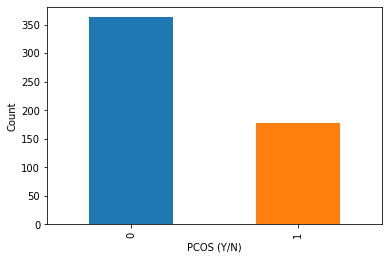

Blood Group
15    206
13    134
11    108
17     42
16     19
14     16
12     13
18      2
Name: Blood Group, dtype: int64


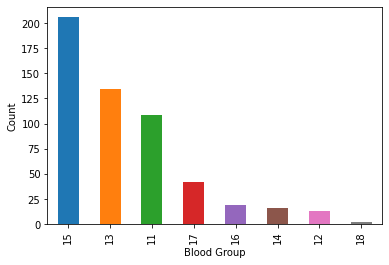

Pregnant(Y/N)
0    334
1    206
Name: Pregnant(Y/N), dtype: int64


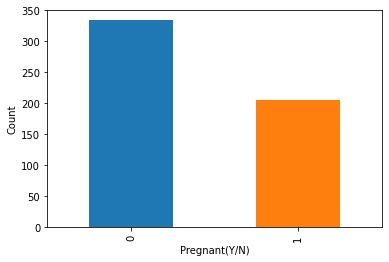

Weight gain(Y/N)
0    336
1    204
Name: Weight gain(Y/N), dtype: int64


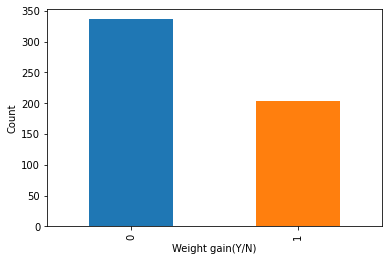

hair growth(Y/N)
0    392
1    148
Name: hair growth(Y/N), dtype: int64


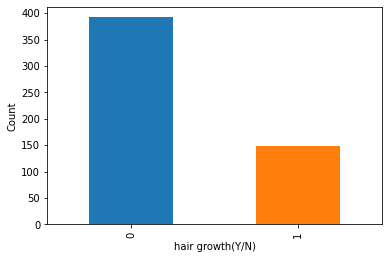

Skin darkening (Y/N)
0    374
1    166
Name: Skin darkening (Y/N), dtype: int64


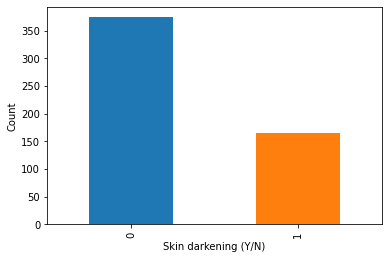

Hair loss(Y/N)
0    295
1    245
Name: Hair loss(Y/N), dtype: int64


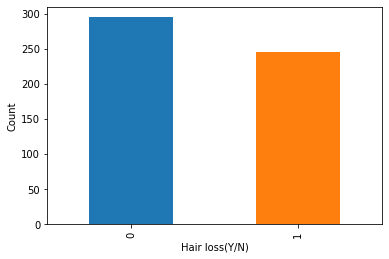

Pimples(Y/N)
0    276
1    264
Name: Pimples(Y/N), dtype: int64


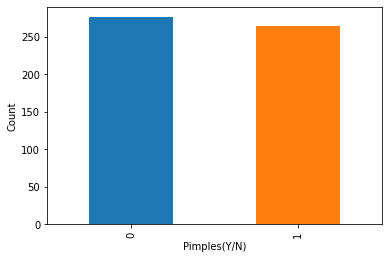

Fast food (Y/N)
1.0    279
0.0    261
Name: Fast food (Y/N), dtype: int64


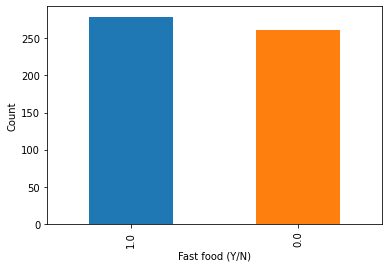

Reg.Exercise(Y/N)
0    407
1    133
Name: Reg.Exercise(Y/N), dtype: int64


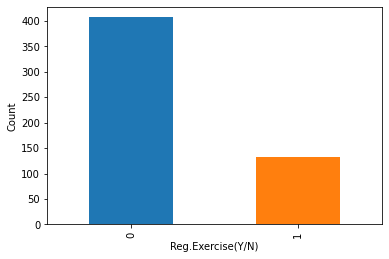

In [ ]:
# Plotting all the categorical variables using bar plot
cv = ['PCOS (Y/N)','Blood Group','Pregnant(Y/N)','Weight gain(Y/N)','hair growth(Y/N)','Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)']

for i in cv:
  plt.xlabel(i)
  plt.ylabel('Count')
  c=pcos_dt[i].value_counts()
  print(i)
  print(c)
  colors = [('C'+str(j)) for j in range(len(c))]
  pcos_dt[i].value_counts().plot(kind='bar',color=colors)
  plt.show()

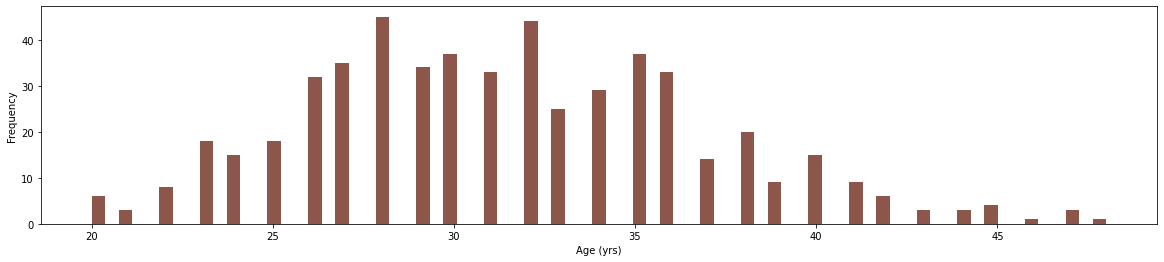

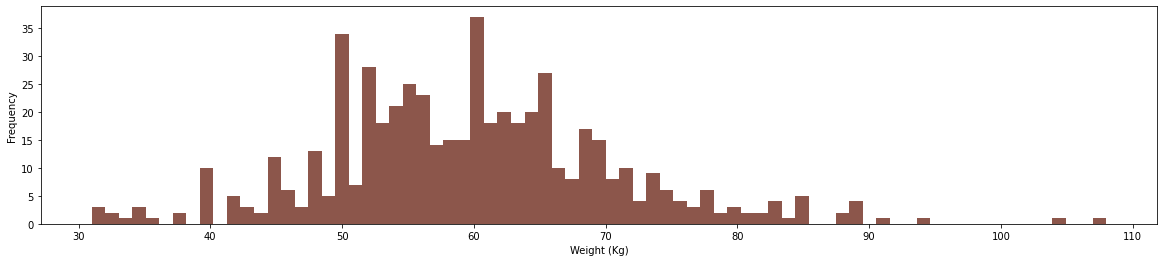

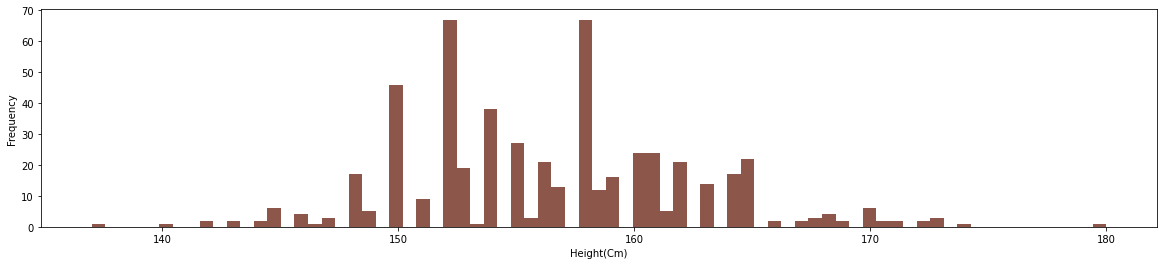

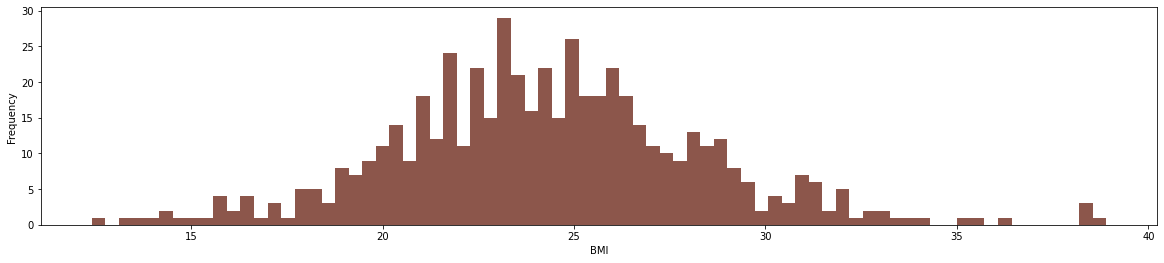

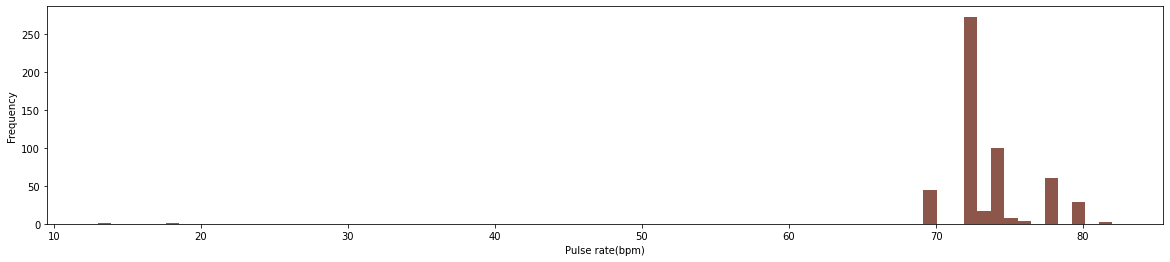

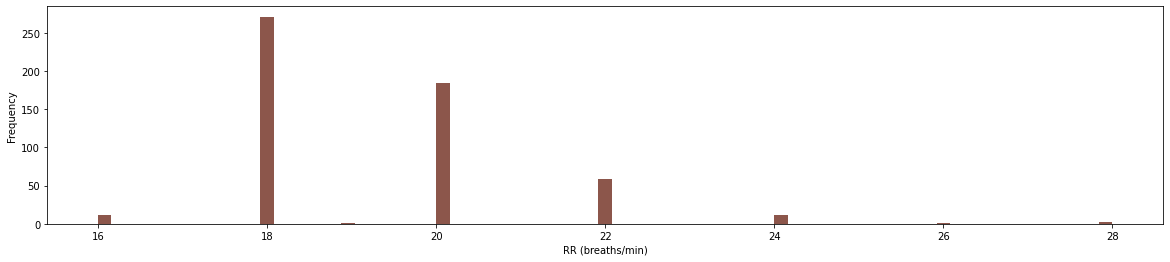

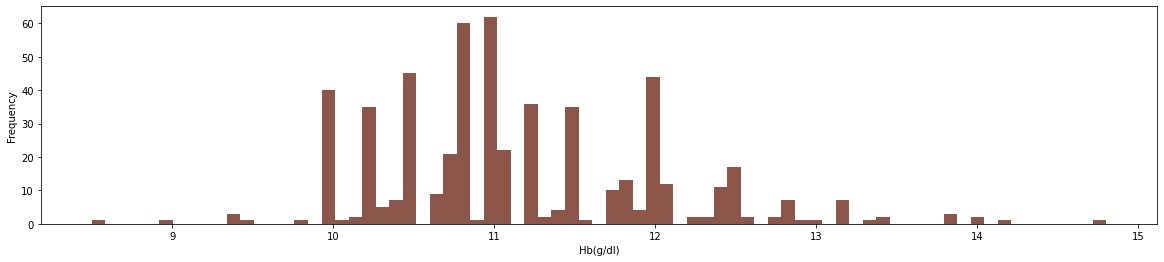

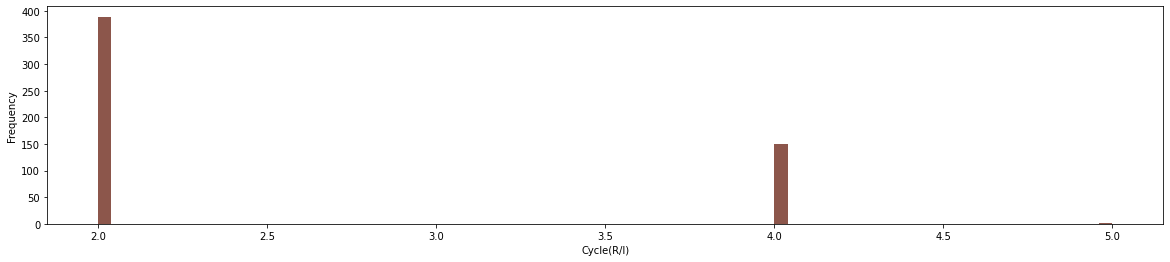

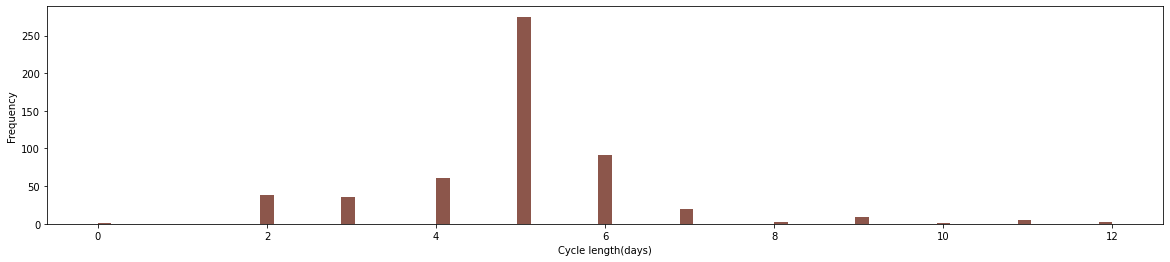

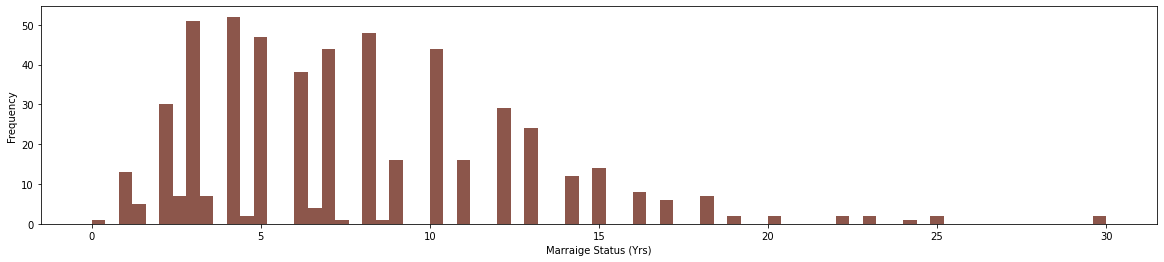

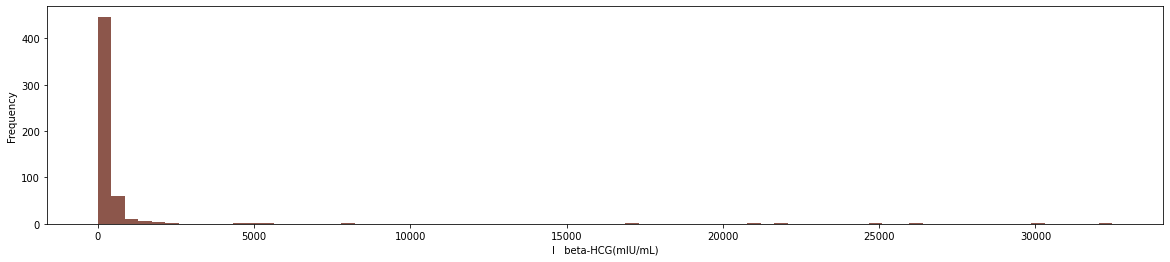

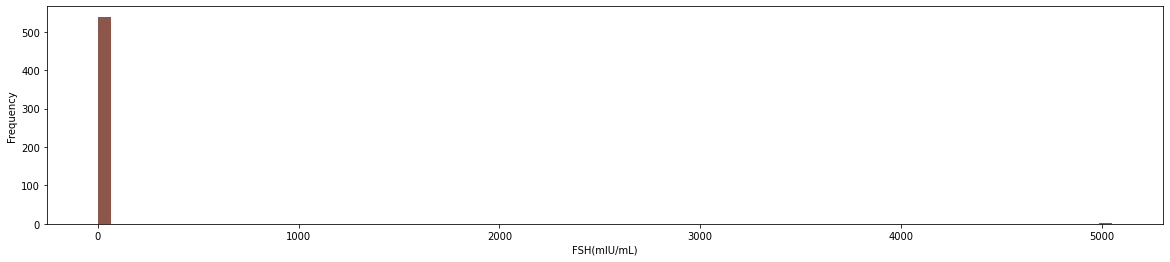

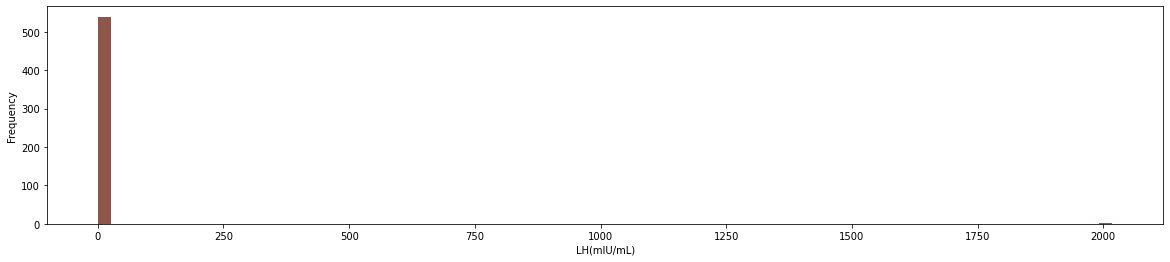

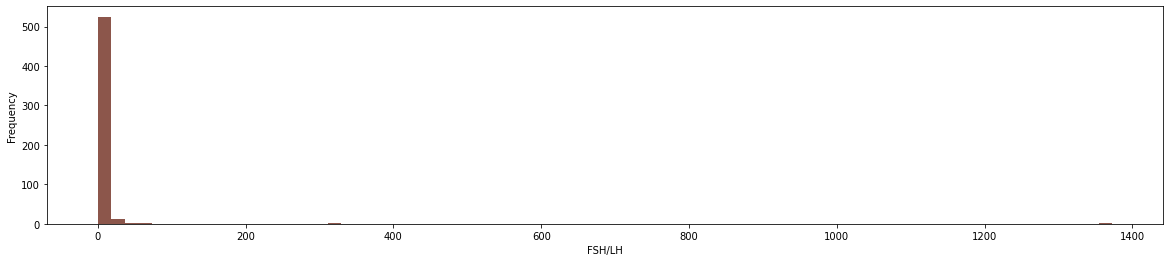

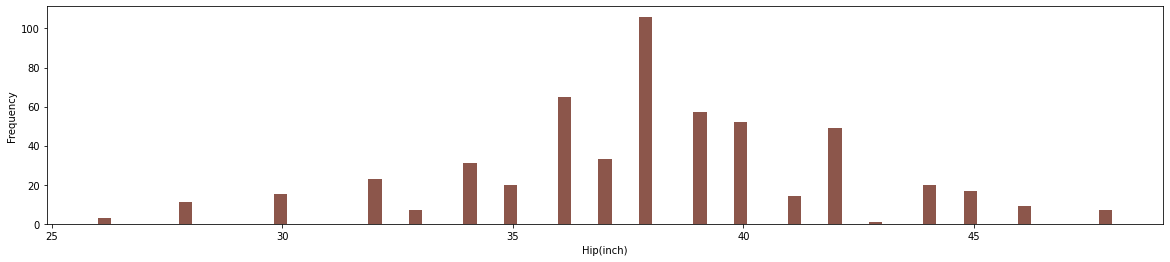

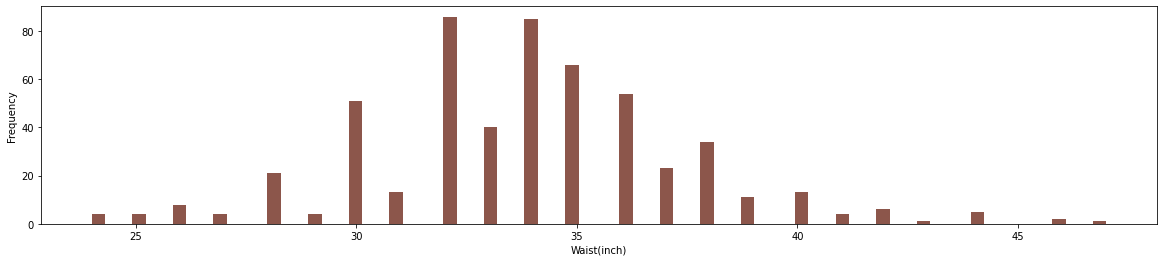

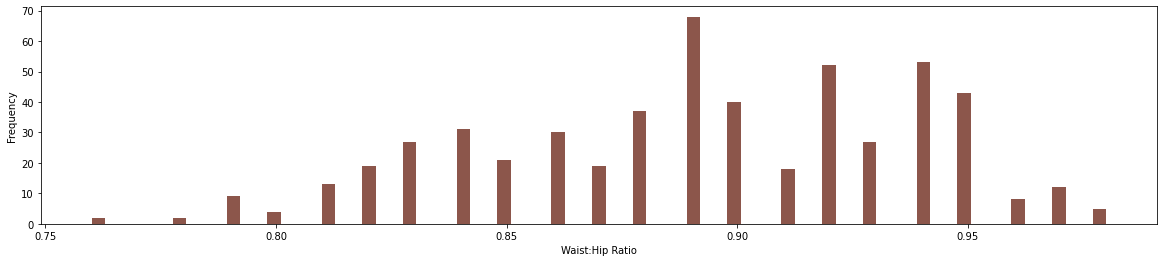

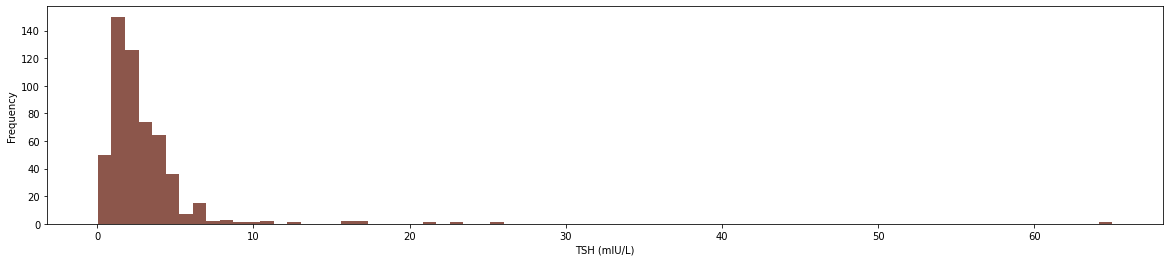

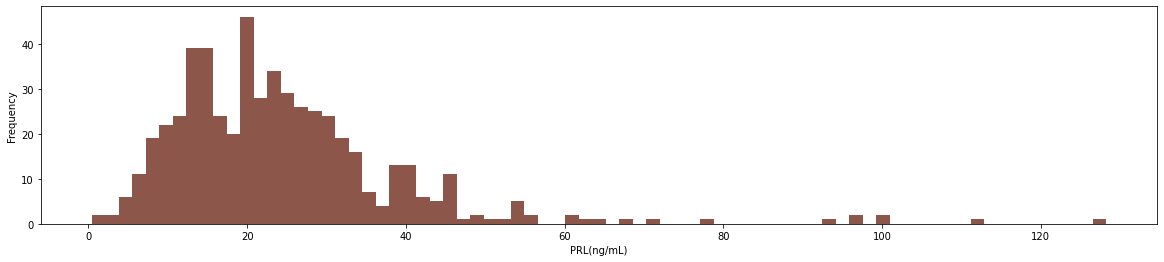

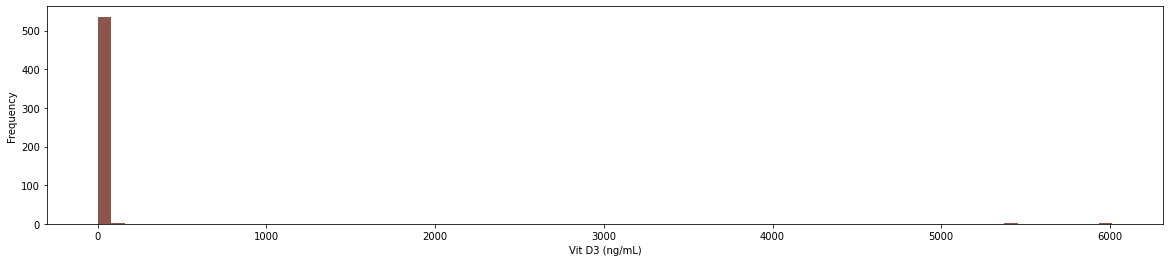

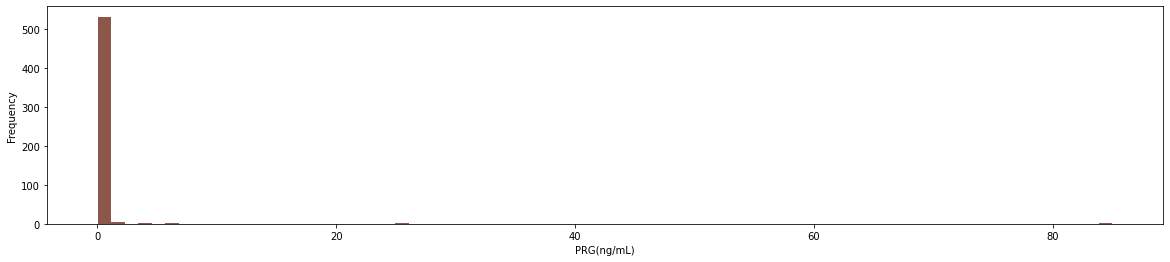

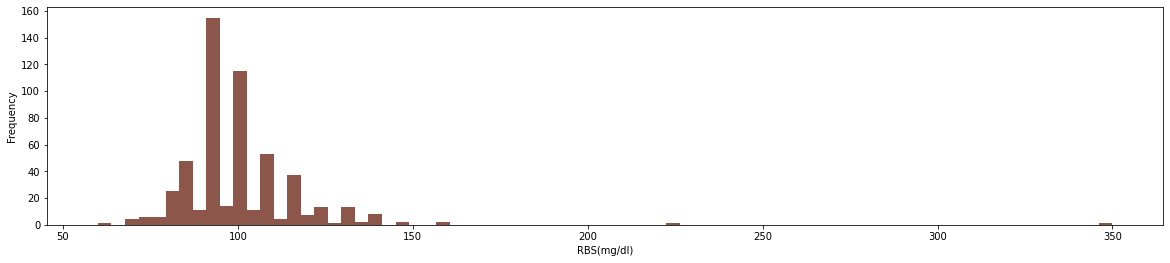

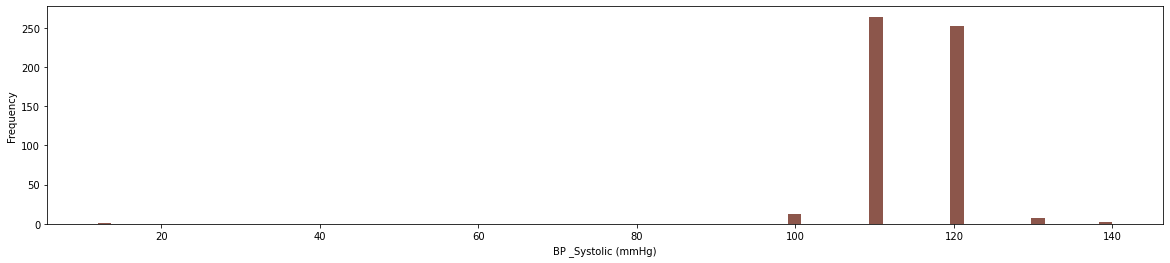

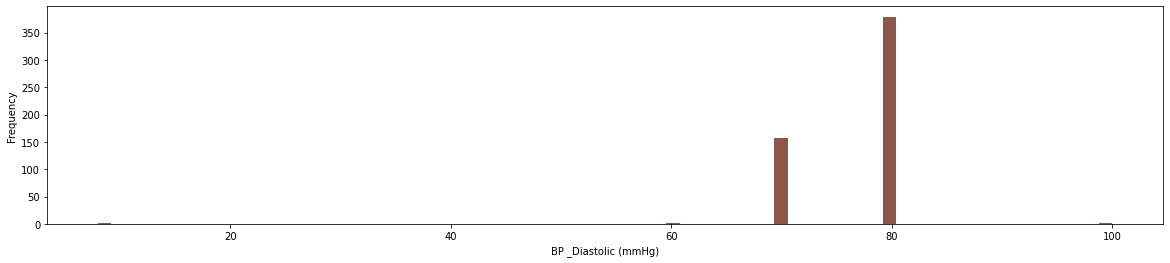

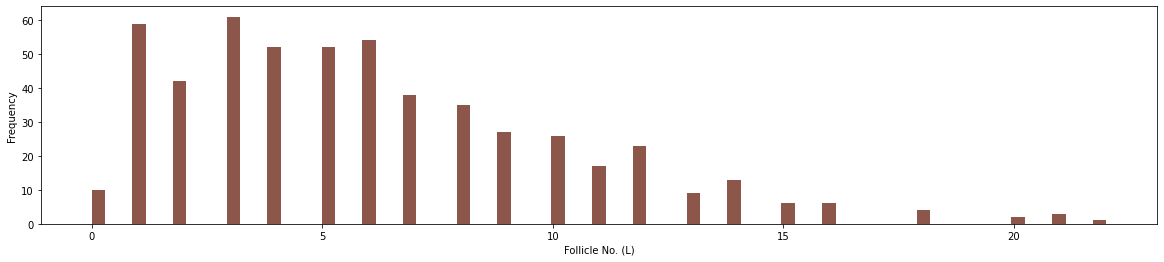

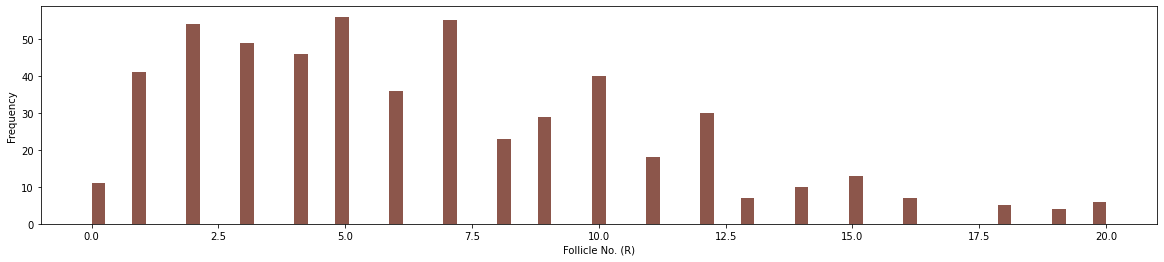

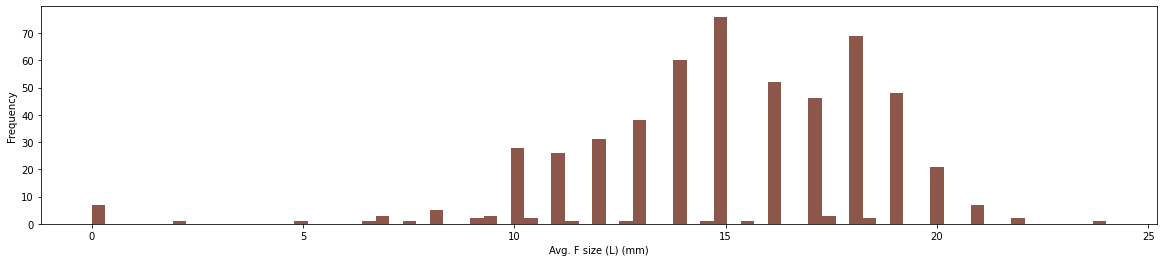

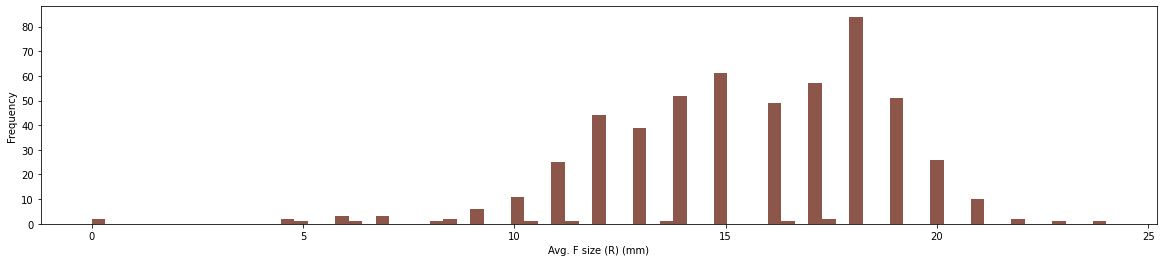

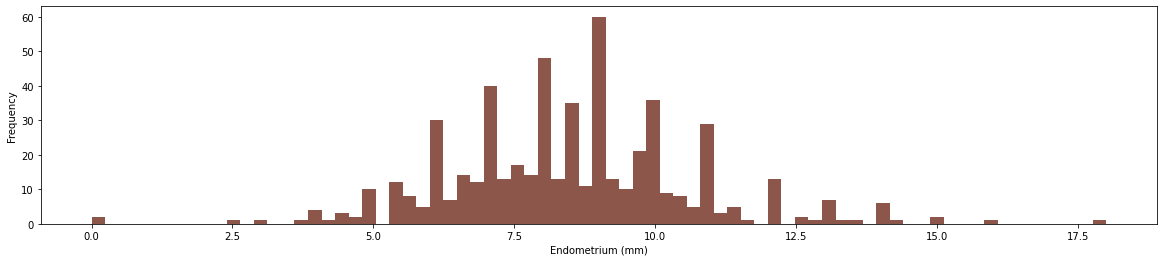

In [ ]:
# Plotting all the numerical variables using histogram and box plot
nv = ['Age (yrs)', 'Weight (Kg)','Height(Cm)', 'BMI','Pulse rate(bpm)',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)','I   beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)','BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)']
for i in nv:
  plt.figure(figsize=(20,4))
  plt.hist(pcos_dt[i], bins = 75,color='C5')
  plt.xlabel(i)
  plt.ylabel('Frequency')
  plt.show()


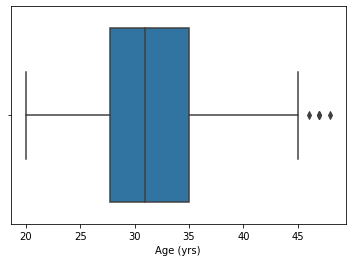

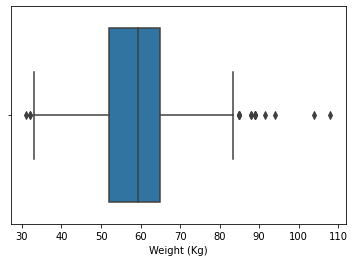

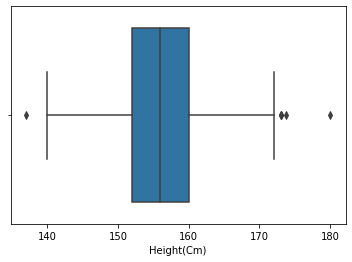

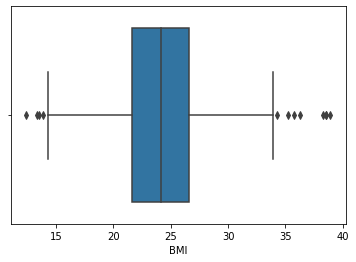

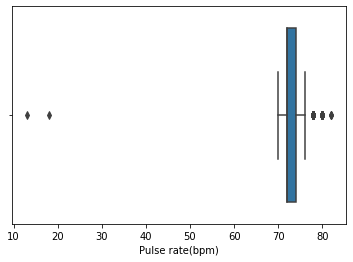

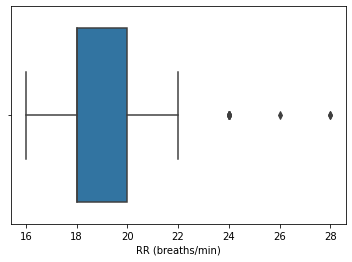

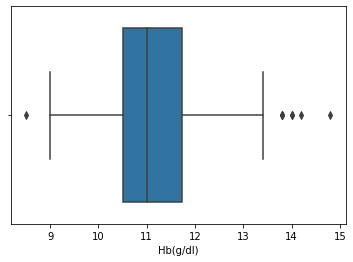

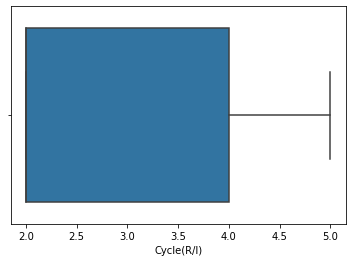

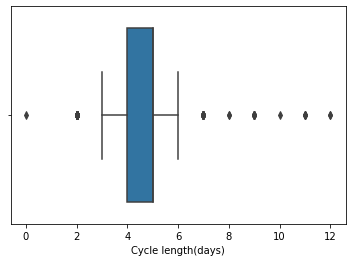

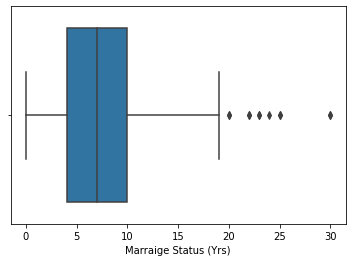

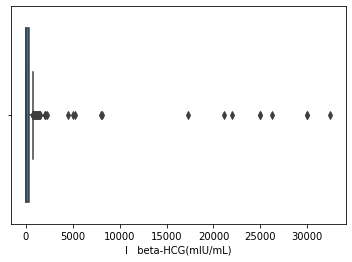

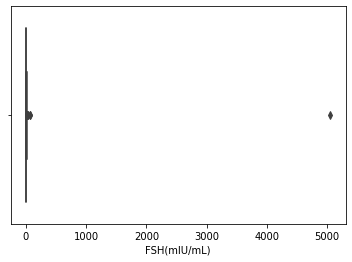

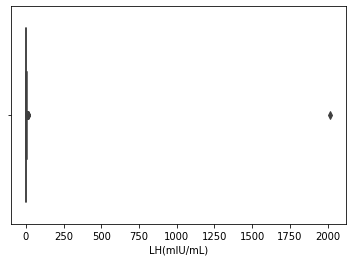

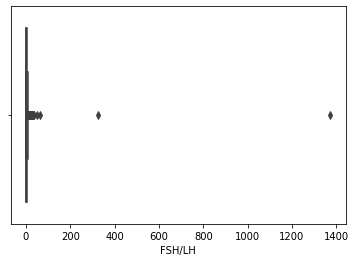

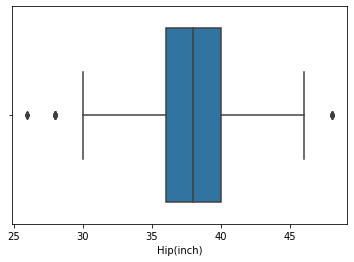

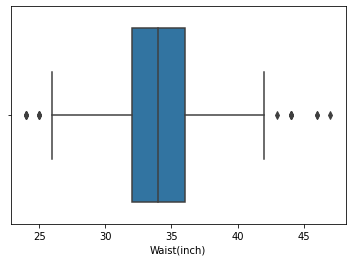

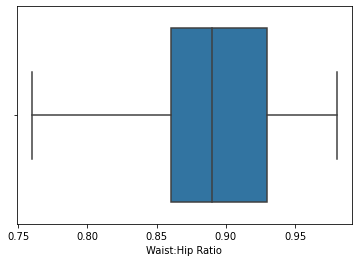

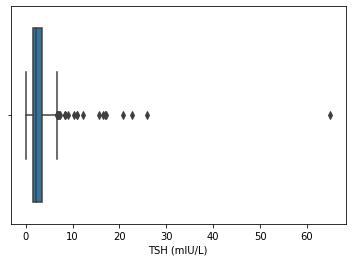

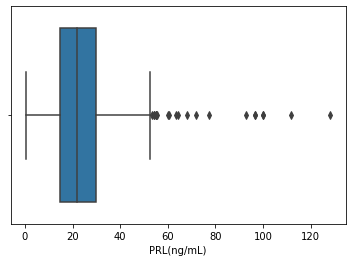

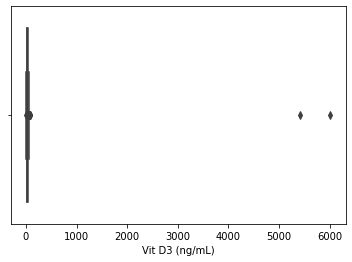

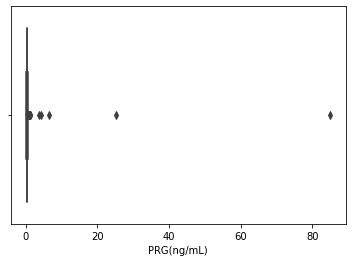

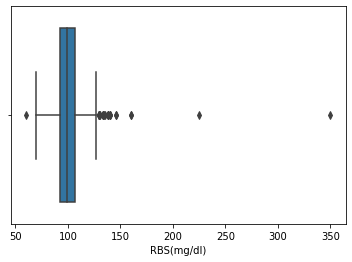

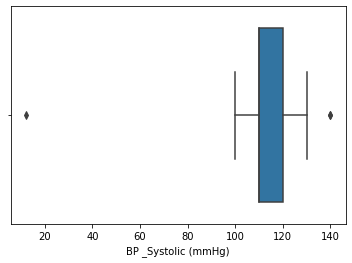

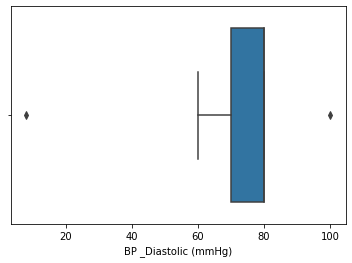

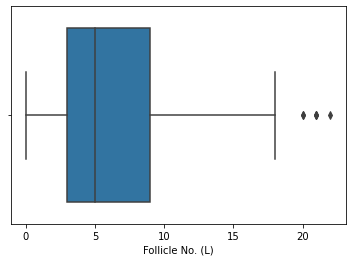

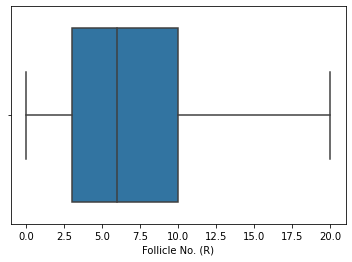

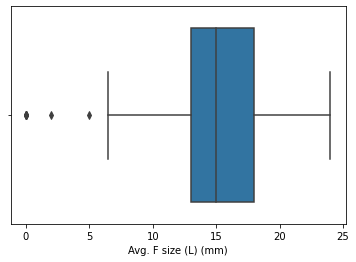

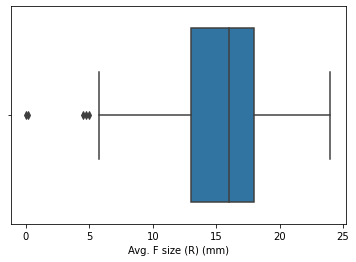

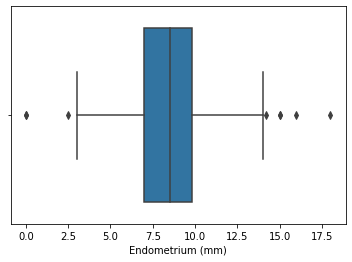

In [144]:
for i in nv:
  boxplot(x=i, data=pcos_dt)
  # show plot
  plt.show()

#**Feature Selection**

Correlation can be positive (increase in one value of feature increases the value of the target variable) 
or negative (increase in one value of feature decreases the value of the target variable)

Using correlation with heatmap to identify the important features

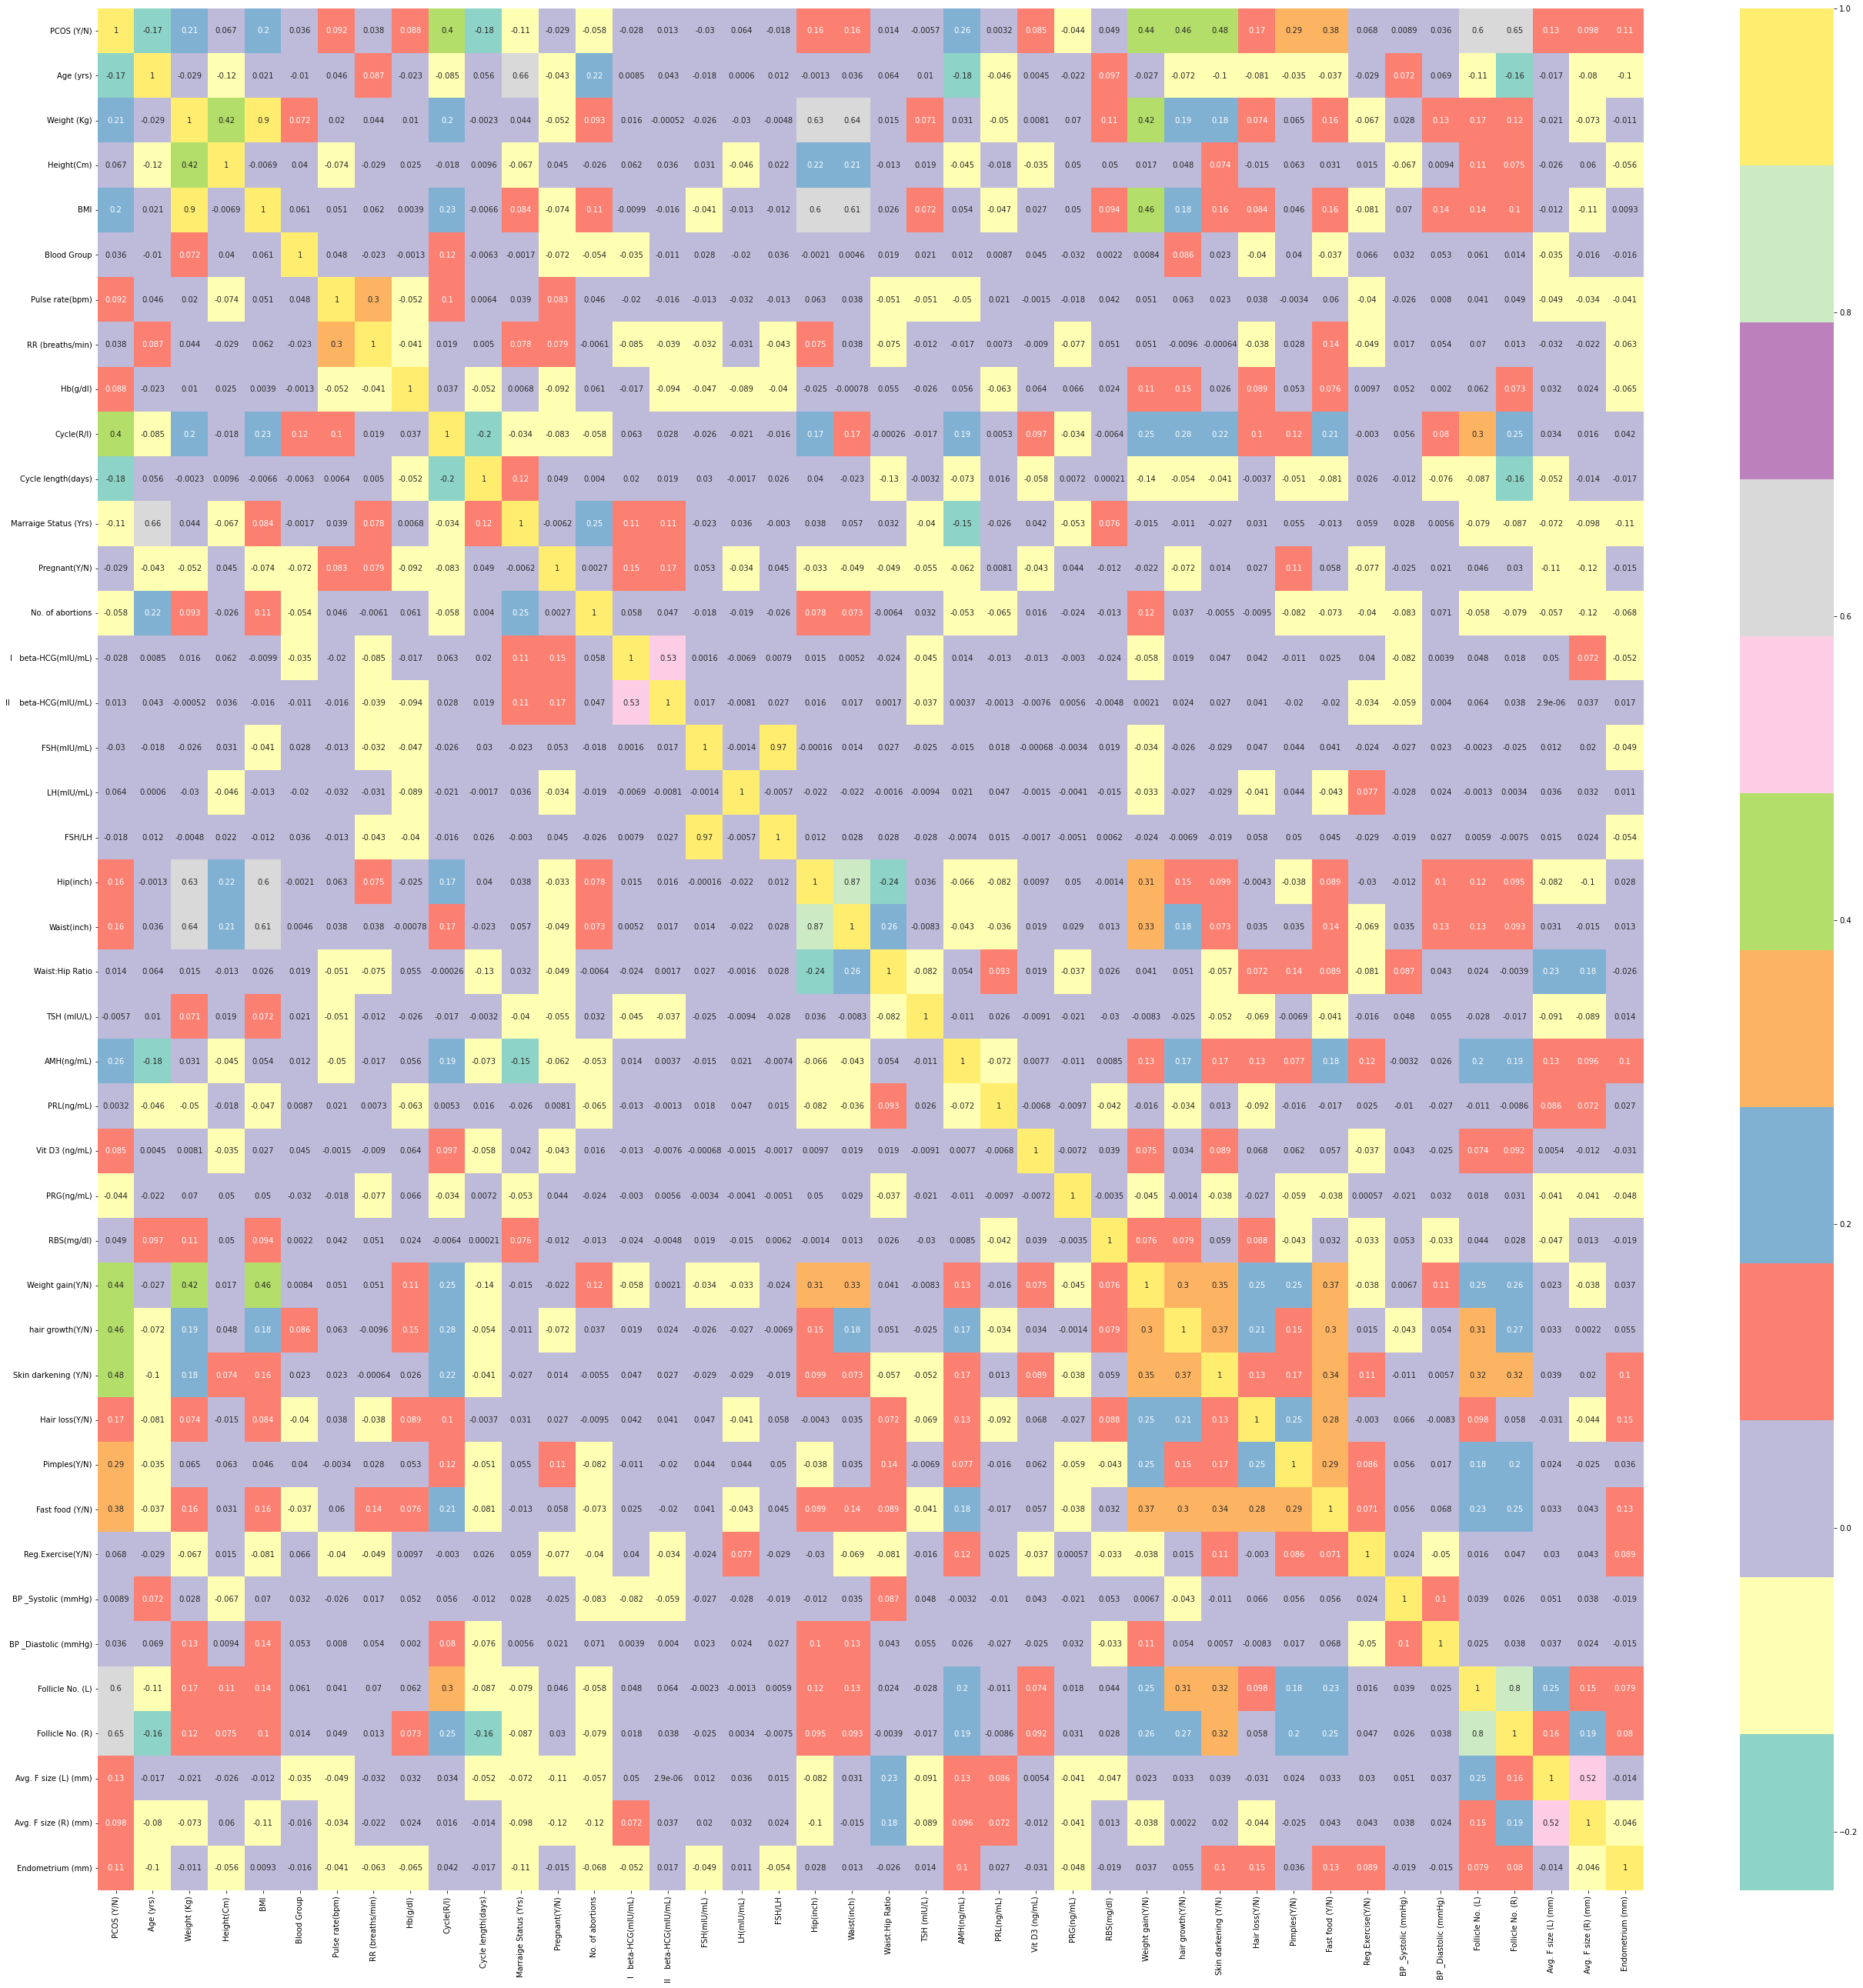

In [ ]:
correlation_mat = pcos_normalized_dt.corr()

#get correlations of each features in dataset
feature_index = correlation_mat.index
plt.figure(figsize = (45,45))

#plot heat map
plot_heatmap = sns.heatmap(pcos_normalized_dt[feature_index].corr(),annot=True,cmap="Set3")


In [ ]:
correlation_mat['PCOS (Y/N)'].sort_values(ascending=False)

PCOS (Y/N)                1.000000
Follicle No. (R)          0.648223
Follicle No. (L)          0.603109
Skin darkening (Y/N)      0.475283
hair growth(Y/N)          0.464245
Weight gain(Y/N)          0.440488
Cycle(R/I)                0.401165
Fast food (Y/N)           0.375389
Pimples(Y/N)              0.287802
AMH(ng/mL)                0.263863
Weight (Kg)               0.211628
BMI                       0.199753
Hair loss(Y/N)            0.171913
Waist(inch)               0.164378
Hip(inch)                 0.161480
Avg. F size (L) (mm)      0.133808
Endometrium (mm)          0.105151
Avg. F size (R) (mm)      0.097950
Pulse rate(bpm)           0.092084
Hb(g/dl)                  0.088046
Vit D3 (ng/mL)            0.085491
Reg.Exercise(Y/N)         0.067809
Height(Cm)                0.067358
LH(mIU/mL)                0.063817
RBS(mg/dl)                0.048956
RR (breaths/min)          0.037530
BP _Diastolic (mmHg)      0.036494
Blood Group               0.035892
Waist:Hip Ratio     

Selecting the top 15 features with highest p-value

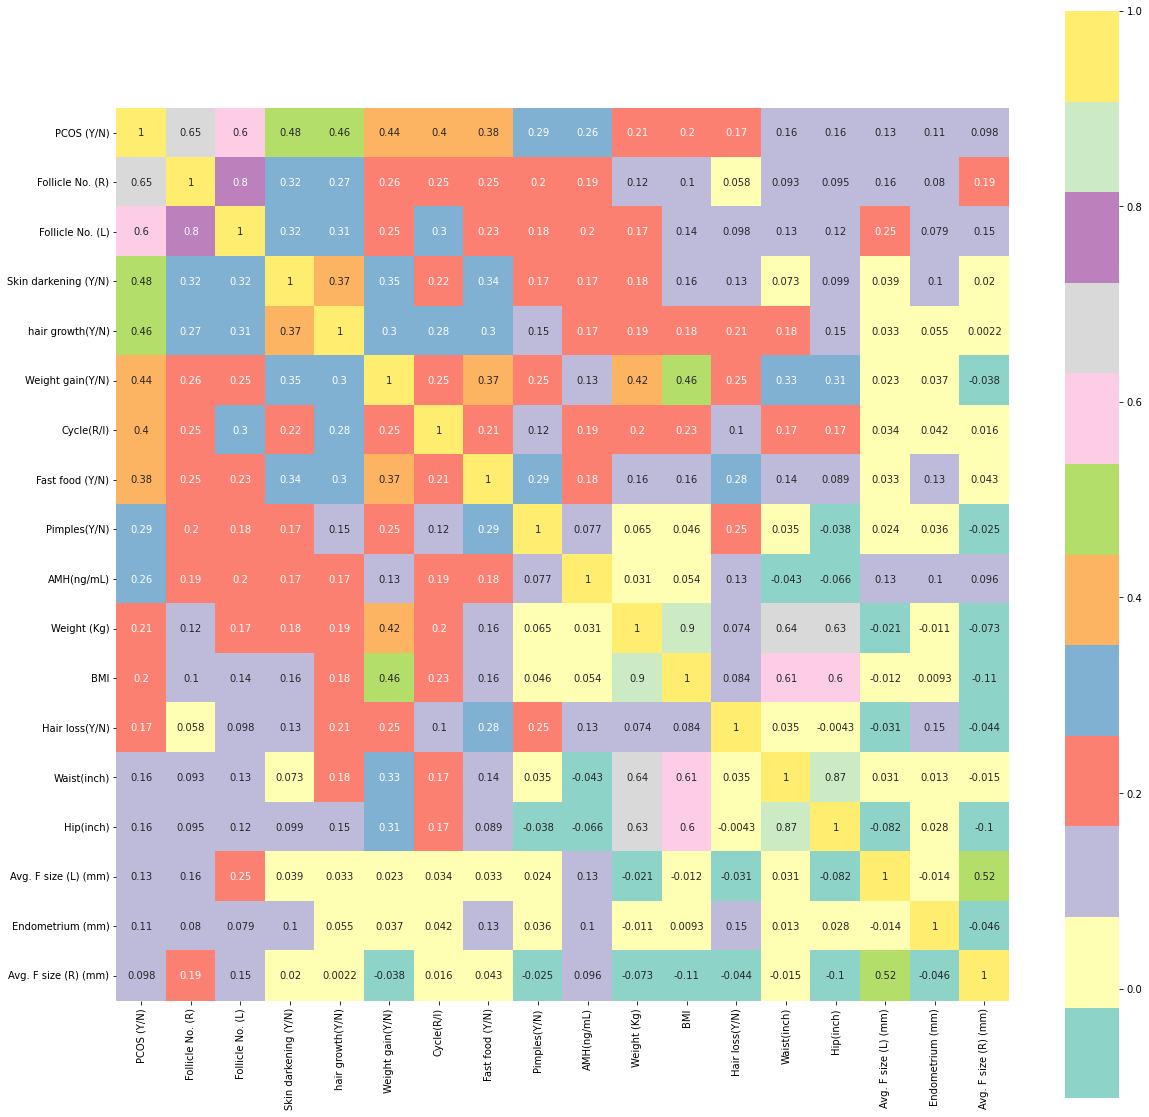

In [ ]:
imp_features = correlation_mat.nlargest(18,'PCOS (Y/N)')['PCOS (Y/N)'].index 
plt.figure(figsize = (20,20))
plot_heat_map_after = sns.heatmap(pcos_normalized_dt[imp_features].corr(),annot=True,square=True,
                                  cmap="Set3",annot_kws={'size':10})


As we can see the columns Weight gain(Y/N) and BMI is highly correlated. Similarly, the columns Hair loss(Y/N)  and Waist(inch) is also highly correlated, hence we have to drop one column from each pair.

In [ ]:
correlation_mat.nlargest(18,'PCOS (Y/N)')['PCOS (Y/N)']

PCOS (Y/N)              1.000000
Follicle No. (R)        0.648223
Follicle No. (L)        0.603109
Skin darkening (Y/N)    0.475283
hair growth(Y/N)        0.464245
Weight gain(Y/N)        0.440488
Cycle(R/I)              0.401165
Fast food (Y/N)         0.375389
Pimples(Y/N)            0.287802
AMH(ng/mL)              0.263863
Weight (Kg)             0.211628
BMI                     0.199753
Hair loss(Y/N)          0.171913
Waist(inch)             0.164378
Hip(inch)               0.161480
Avg. F size (L) (mm)    0.133808
Endometrium (mm)        0.105151
Avg. F size (R) (mm)    0.097950
Name: PCOS (Y/N), dtype: float64

In [ ]:
imp_features

Index(['PCOS (Y/N)', 'Follicle No. (R)', 'Follicle No. (L)',
       'Skin darkening (Y/N)', 'hair growth(Y/N)', 'Weight gain(Y/N)',
       'Cycle(R/I)', 'Fast food (Y/N)', 'Pimples(Y/N)', 'AMH(ng/mL)',
       'Weight (Kg)', 'BMI', 'Hair loss(Y/N)', 'Waist(inch)', 'Hip(inch)',
       'Avg. F size (L) (mm)', 'Endometrium (mm)', 'Avg. F size (R) (mm)'],
      dtype='object')

In [ ]:
pcos_df = pcos_normalized_dt[imp_features]

In [ ]:
pcos_df.drop(labels=['Weight (Kg)','Hip(inch)'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
pcos_df.head()
pcos_df.shape

(540, 16)

In [ ]:
pcos_df.columns

Index(['PCOS (Y/N)', 'Follicle No. (R)', 'Follicle No. (L)',
       'Skin darkening (Y/N)', 'hair growth(Y/N)', 'Weight gain(Y/N)',
       'Cycle(R/I)', 'Fast food (Y/N)', 'Pimples(Y/N)', 'AMH(ng/mL)', 'BMI',
       'Hair loss(Y/N)', 'Waist(inch)', 'Avg. F size (L) (mm)',
       'Endometrium (mm)', 'Avg. F size (R) (mm)'],
      dtype='object')

#**Model**

##Dataset splitting

Splitting dataset into training, validation, and test sets.

In [ ]:
X = pcos_df.iloc[:,1:].values
y = pcos_df.iloc[:,0].values

In [ ]:
print(X.shape)
print(y.shape)

(540, 15)
(540,)


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.3,random_state=189)
X_val,X_test,y_val,y_test = train_test_split(X_test, y_test,test_size=0.3,random_state=189)

##Logistic Regression


###Implementation from scratch

In [ ]:
class LR:

    def __init__(self,X,Y):

        self.o=np.ones((X.shape[0],1))
        self.X=np.concatenate((self.o,X),axis=1)
        self.t=np.zeros(self.X.shape[1])
        self.y=Y

    def sigmoid(self,z,t):
        x=np.dot(z,t)
        return(1/(1+np.exp(-x)))
    
    def loss(self,hyp,Y):
        l=(-Y * np.log(hyp) - (1 - Y) * np.log(1 - hyp)).mean()
        return(l)
    
    def GD(self,X,hyp,Y):
        l=Y.shape[0]
        return(np.dot(X.T,(hyp-Y))/l)
    
    
    #using mini-batch gradient descent algorithm
    def train(self,batch_size,epochs,lr):
        n=self.X.shape[0]
        f=self.X.shape[1]
        loss_l=[]
        b=0
      
        for i in range(epochs):
            for b in  range(n//batch_size):

                s_i=b*batch_size
                e_i=s_i+(batch_size-1)

                
                BX = self.X[s_i:e_i]
                BY = self.y[s_i:e_i]
                
                hyp = self.sigmoid(BX,self.t)
                
                der = self.GD(BX,hyp,BY)
                
                self.t = self.t-lr*der #parameter updation happens batch_size*epoch no of times

            los = self.loss(self.sigmoid(self.X,self.t),self.y)
            loss_l.append(los)
            
        return (self.t,loss_l)
    
    def predict(self,X,t):
        self.o1=np.ones((X.shape[0],1))
        X=np.concatenate((self.o1,X),axis=1)
        pred=self.sigmoid(X,t)
        
        class_pred=[]
        
        class_pred=[1 if p>0.5 else 0 for p in pred]
        
        return(class_pred)

In [ ]:
ler = [0.001,0.003,0.005,0.01,0.03,0.05,0.1,0.3,0.5]
ler_ac=[]

In [ ]:
for i in ler:

    print('---------------Learning Rate:',i,'-----------')
    print()

    LR_model = LR(X_train,y_train)
    theta,loss = LR_model.train(5,2500,i) 

    print('****Theta*****')
    print()
    print(theta)
    print()

    y_p = LR_model.predict(X_val,theta)
    ac_lr = sum(y_p == y_val) / y_val.shape[0]

    print(ac_lr*100)
    ler_ac.append((ac_lr*100))
    print('--------------------------------------------------------------')


---------------Learning Rate: 0.001 -----------

****Theta*****

[-3.18296399  3.90750916  2.79523348  1.25619928  1.20378979  1.21577606
  1.57897817  0.42469544  0.07505376  0.40941059 -0.91499087  0.09499398
 -0.77271515 -0.44216056 -0.83627712 -0.56010269]

90.2654867256637
--------------------------------------------------------------
---------------Learning Rate: 0.003 -----------

****Theta*****

[-5.12473947  6.32270833  4.15465358  1.37835356  1.53195704  1.43161221
  1.91547741  0.34541196  0.22664516  0.68034857 -1.29985395  0.2999731
 -0.93471828 -0.12386881 -0.90137765 -0.30687465]

92.03539823008849
--------------------------------------------------------------
---------------Learning Rate: 0.005 -----------

****Theta*****

[-6.2855786   7.39021847  4.55233505  1.46416783  1.73190848  1.51203608
  2.0696719   0.30955513  0.32692276  0.81058377 -1.44582875  0.38807932
 -0.93894433  0.15706729 -0.76484124 -0.04927089]

92.92035398230088
------------------------------------

Finding the best learning rate

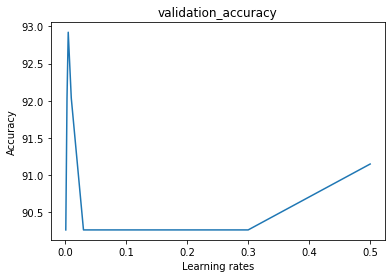

In [ ]:
plt.plot(ler,ler_ac)
plt.xlabel('Learning rates')
plt.ylabel('Accuracy')
plt.title('validation_accuracy')
plt.show()

In [ ]:
#Finding the learning rate for which Accuracy is maximum

max_acc_lr = max(ler_ac)  
max_ler = ler[ler_ac.index(max_acc_lr)]  
print(max_acc_lr, max_ler)

92.92035398230088 0.005


In [ ]:
LR_model = LR(X_train,y_train)
theta,loss = LR_model.train(5,2500,max_ler) 

y_p = LR_model.predict(X_test,theta)
ac_lr = sum(y_p == y_test) / y_test.shape[0]
ac_lr = ac_lr*100
print(ac_lr)

93.87755102040816


Loss Vs Iteration graph

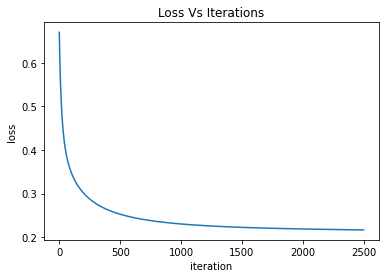

In [ ]:
plt.plot(loss)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('Loss Vs Iterations')
plt.show()

####Analyzation of the model

In [ ]:
print(metrics.classification_report(y_test, y_p))


              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96        36
         1.0       0.92      0.85      0.88        13

    accuracy                           0.94        49
   macro avg       0.93      0.91      0.92        49
weighted avg       0.94      0.94      0.94        49



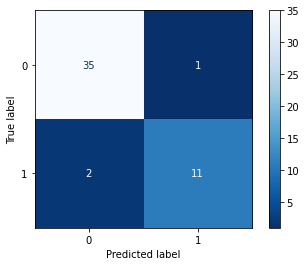

In [ ]:
cm_lr = metrics.confusion_matrix(y_test, y_p)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr,display_labels=['0','1'])
disp.plot(cmap="Blues_r")
plt.show()

###Implemetation using scikit learn

In [ ]:
lr_clf = LogisticRegression(random_state=1, solver='lbfgs',max_iter=2500).fit(X_train, y_train)

In [ ]:
y_pred_LR = lr_clf.predict(X_val)
acc_lr_sci = lr_clf.score(X_val,y_val)*100
print ('Accuracy (LR scikit-learn implementation:)',acc_lr_sci)

Accuracy (LR scikit-learn implementation:) 88.49557522123894


####Analyzation of the model

In [ ]:
print(metrics.classification_report(y_val, y_pred_LR))

              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92        75
         1.0       0.96      0.68      0.80        38

    accuracy                           0.88       113
   macro avg       0.91      0.84      0.86       113
weighted avg       0.89      0.88      0.88       113



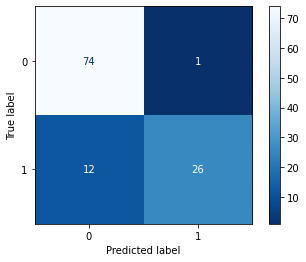

In [ ]:
cm_lr_sci = metrics.confusion_matrix(y_val, y_pred_LR)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_lr_sci, display_labels = ['0','1'])
disp.plot(cmap="Blues_r")
plt.show()

##K Fold cross validation

Evaluating the model using repeated k-fold cross validation

In [ ]:
skf = StratifiedKFold(n_splits=5, random_state=None)
A=[]
for train_index, test_index in skf.split(X,y):
  
  X_train, X_test = X[train_index], X[test_index] 
  y_train, y_test = y[train_index], y[test_index]

  LR_model = LR(X_train,y_train)
  theta,losses = LR_model.train(5,2500,max_ler)

  y_p = LR_model.predict(X_test,theta)
  ac_gd = sum(y_p == y_test) / y_test.shape[0]

  A.append((ac_gd*100))

In [ ]:
print('Average accuracy of the model after cross validation: ')
np.mean(A)

Average accuracy of the model after cross validation: 


90.18518518518518

##Decision Tree 

In [ ]:
depths = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,110,120,130,140,150,160,170,180,200]
ac=[]

In [ ]:
for i in depths:
  dtree_clf = tree.DecisionTreeClassifier(max_depth=i,min_samples_leaf=4)
  dtree_clf.fit(X_train,y_train)
  y_pred_dtree = dtree_clf.predict(X_val)
  ac.append(accuracy_score(y_val,y_pred_dtree)*100)

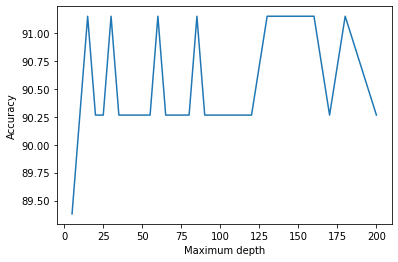

In [ ]:
plt.plot(depths,ac,label='Test_accuracy')
plt.xlabel('Maximum depth')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#Finding the depth for which Accuracy is maximum

max_acc = max(ac)  
max_dt = depths[ac.index(max_acc)]  
print(max_acc, max_dt)

91.1504424778761 15


In [ ]:
#Using the depth which gave the maximum a15,ccuracy to train the model
dtree_clf = tree.DecisionTreeClassifier(max_depth=max_dt,min_samples_leaf=4)
dtree_clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=4)

In [ ]:
y_pred_dtree = dtree_clf.predict(X_val)

In [ ]:
acc_dtree = accuracy_score(y_val,y_pred_dtree)*100
print(acc_dtree)

90.2654867256637


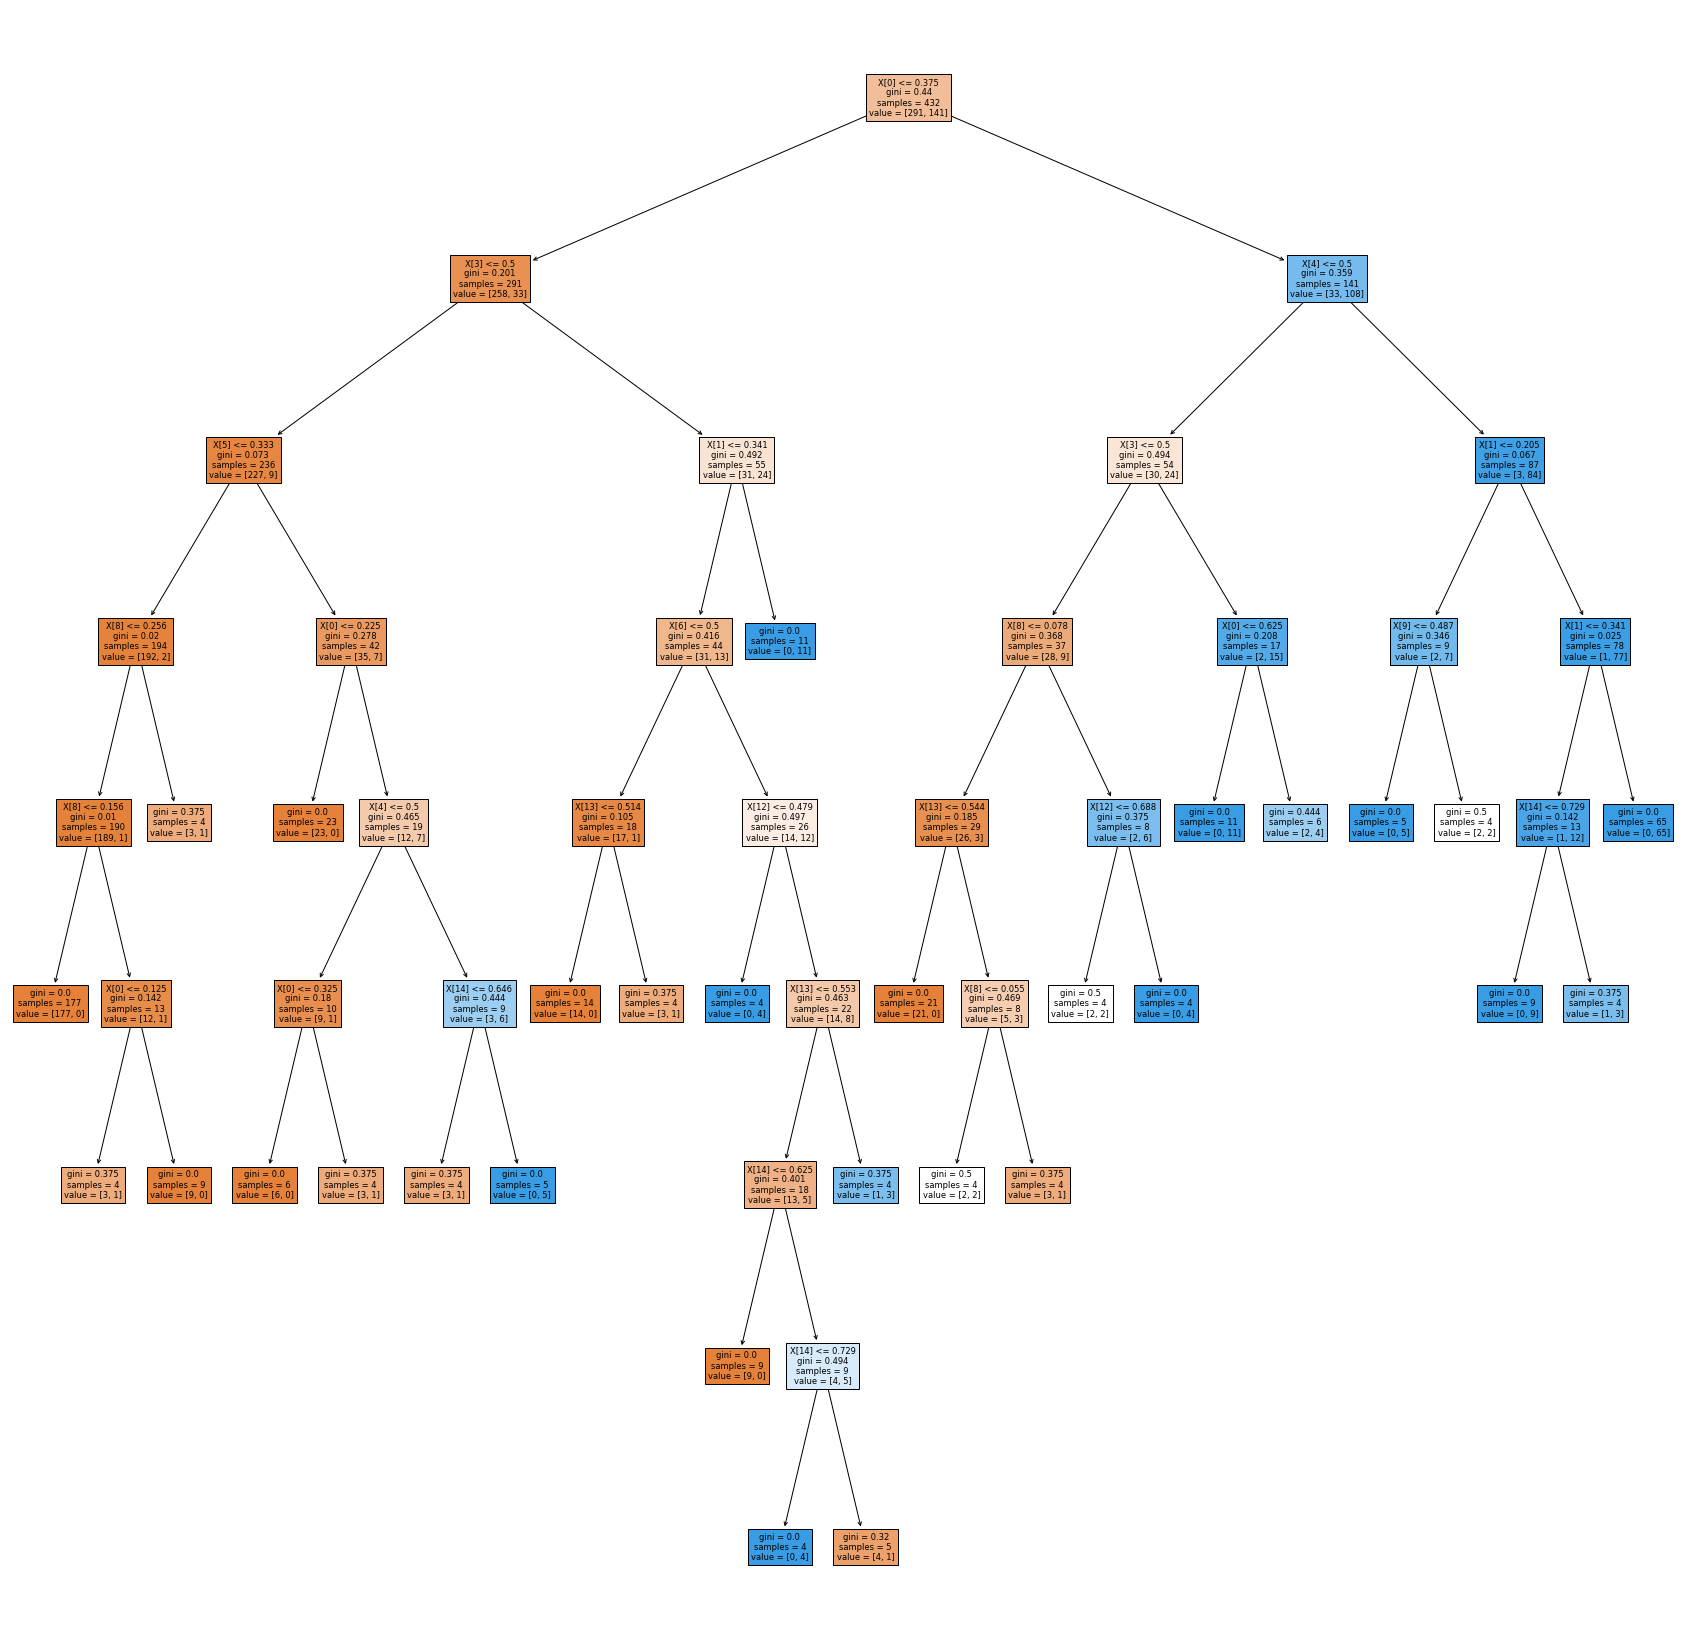

In [ ]:
fig = plt.figure(figsize=(30,30))
dtree_plot = tree.plot_tree(dtree_clf,filled=True)

####Analyzation of the model

In [ ]:
print(metrics.classification_report(y_val, y_pred_dtree))

              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93        75
         1.0       0.94      0.76      0.84        38

    accuracy                           0.90       113
   macro avg       0.91      0.87      0.89       113
weighted avg       0.91      0.90      0.90       113



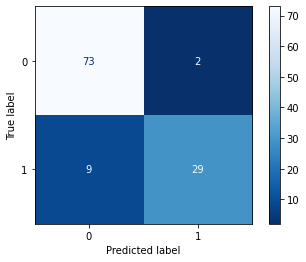

In [ ]:
cm_dree = metrics.confusion_matrix(y_val, y_pred_dtree)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_dree, display_labels = ['0','1'])
disp.plot(cmap="Blues_r")
plt.show()

##SVM 

In [ ]:
S = SVC(kernel = 'linear')
S.fit(X_train,y_train)

SVC(kernel='linear')

In [ ]:
y_pred_svm = S.predict(X_val)

In [ ]:
acc_svm = accuracy_score(y_val,y_pred_svm)*100
print(acc_svm)

89.38053097345133


In [ ]:
print(metrics.classification_report(y_val, y_pred_svm))

              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92        75
         1.0       0.93      0.74      0.82        38

    accuracy                           0.89       113
   macro avg       0.91      0.86      0.87       113
weighted avg       0.90      0.89      0.89       113



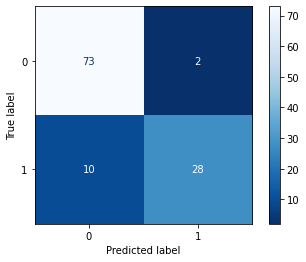

In [ ]:
cm_svm = metrics.confusion_matrix(y_val, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_svm, display_labels = ['0','1'])
disp.plot(cmap="Blues_r")
plt.show()

##Naive Bayes classifier

In [ ]:
gnb = GaussianNB()
y_pred_nb = gnb.fit(X_train, y_train).predict(X_val)

In [ ]:
acc_nb = accuracy_score(y_val,y_pred_nb)*100
print(acc_nb)

89.38053097345133


In [ ]:
print(metrics.classification_report(y_val, y_pred_nb))

              precision    recall  f1-score   support

         0.0       0.89      0.96      0.92        75
         1.0       0.91      0.76      0.83        38

    accuracy                           0.89       113
   macro avg       0.90      0.86      0.88       113
weighted avg       0.89      0.89      0.89       113



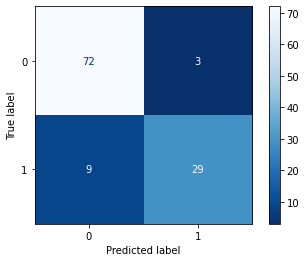

In [ ]:
cm_nb = metrics.confusion_matrix(y_val, y_pred_nb)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_nb, display_labels = ['0','1'])
disp.plot(cmap="Blues_r")
plt.show()

##KNN

In [ ]:
knn = [3,5,7,9,15,21,25,31,37,41,43,57]
ac_knn=[]

In [ ]:
for l in knn:
  print('-----k =',l,'------')
  k = KNeighborsClassifier(n_neighbors=l)
  k.fit(X_train,y_train)

  y_pred_knn = k.predict(X_val)
  acc_knn = accuracy_score(y_val,y_pred_knn)*100
  ac_knn.append(acc_knn)

  print('Accuracy:',acc_knn)
  print()

-----k = 3 ------
Accuracy: 84.070796460177

-----k = 5 ------
Accuracy: 86.72566371681415

-----k = 7 ------
Accuracy: 84.95575221238938

-----k = 9 ------
Accuracy: 84.95575221238938

-----k = 15 ------
Accuracy: 85.84070796460178

-----k = 21 ------
Accuracy: 86.72566371681415

-----k = 25 ------
Accuracy: 84.95575221238938

-----k = 31 ------
Accuracy: 85.84070796460178

-----k = 37 ------
Accuracy: 85.84070796460178

-----k = 41 ------
Accuracy: 84.95575221238938

-----k = 43 ------
Accuracy: 84.95575221238938

-----k = 57 ------
Accuracy: 85.84070796460178



Finding the best k value

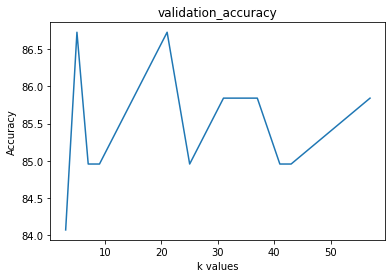

In [ ]:
plt.plot(knn,ac_knn)
plt.xlabel('k values')
plt.ylabel('Accuracy')
plt.title('validation_accuracy')
plt.show()

In [ ]:
#Finding the learning rate for which Accuracy is maximum

max_acc = max(ac_knn)  
max_knn = knn[ac_knn.index(max_acc)]  
print(max_acc, max_knn)

86.72566371681415 5


In [ ]:
k = KNeighborsClassifier(n_neighbors=max_knn)
k.fit(X_train,y_train)

y_pred_knn = k.predict(X_val)

acc_knn = accuracy_score(y_val,y_pred_knn)*100

In [ ]:
print(acc_knn)

86.72566371681415


In [ ]:
print(metrics.classification_report(y_val, y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91        75
         1.0       0.90      0.68      0.78        38

    accuracy                           0.87       113
   macro avg       0.88      0.82      0.84       113
weighted avg       0.87      0.87      0.86       113



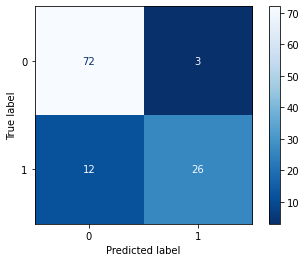

In [ ]:
cm_knn = metrics.confusion_matrix(y_val, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_knn, display_labels = ['0','1'])
disp.plot(cmap="Blues_r")
plt.show()

#**Comparing Different Models**

Using a box plot

In [ ]:
acc_algo = [max_acc_lr,acc_lr_sci,acc_dtree,acc_svm,acc_nb,acc_knn]

In [ ]:
algo = ['LR','LR_sklearn','DTree','SVM',"Naive Baye's",'KNN']

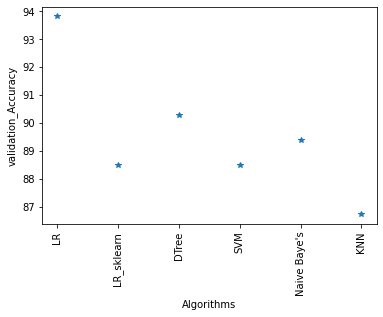

In [ ]:
plt.xlabel('Algorithms')
plt.ylabel('validation_Accuracy')
plt.xticks(rotation='vertical')
plt.plot(algo,acc_algo, '*')
plt.show()